In [226]:
import numpy as np
from importlib import reload
from scipy import signal

import plotting_tools as pt
import utils
import dsi
utils = reload(utils)
pt = reload(pt)
dsi = reload(dsi)

import pickle
import sys
# Notebook needs to see the RKLM_Python module to load pickled class instances
sys.path.append('../RKLM_Python/')

from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt

In [236]:
Nx, Ny = 301, 20
# Nx, Ny = 1201, 80
ib = True
st = False

N = 1

def load(Nx,Ny,et):
    base_fn = 'output_baldauf_brdar'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
    tags = tc.get_tag_dict()
    
    return tc, tags

i2 = (slice(2,-2),slice(2,-2))

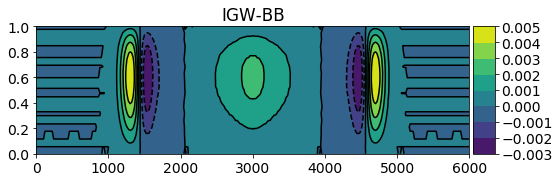

In [237]:
l_typ = 'WINDOW_STEP'
if st: l_typ = 'TIME'
diff = False

attr_labels = pt.labels()

def get_ens(tc, times, sfx , diff, attribute):
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag='after_full_step', inner=False)[1]

    label = sfx + '_' + attribute
    return label, ens.T

typ = 'nonhydro'
# typ = 'hydro'
# typ = 'psinc'

et = 39.4
sfx1 = 'long_%s' %typ
if ib: sfx1 = '%s_ib-0' %sfx1
if st: sfx1 = '%s_st' %sfx1

tc, tags = load(Nx,Ny,et)
times = [56]
if st: times = [39.356]

# load pickled instances of data used in simulation
fn_pickle = tc.get_filename(N,sfx1,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
mpv = pickle.load(file)
dap = pickle.load(file)
elem = pickle.load(file)
file.close()

S0 = (ud.stratification(elem.y)).reshape(-1,1)

attribute = 'rho'
_, a1 = get_ens(tc, times, sfx1, diff, attribute)
attribute = 'rhoY'
_, a2 = get_ens(tc, times, sfx1, diff, attribute)

la = 'IGW-BB'
aa = a2 / a1
aa -= S0 #* ud.T_ref
aa = aa[i2] * ud.T_ref
# aa *= ud.T_ref
sigma = 0.78
# aa = gaussian_filter(aa, sigma)

if sfx1 == 'long':
    lvls = np.arange(-2.5,4.0,0.5) * 1e-3
#     lvls = np.arange(-0.1,11,1) * 1e-3
    lvls = np.arange(-0.0025,0.00295,0.000496)

ll = [aa, la]
pl_lst = [ll]

pl = pt.plotter(pl_lst,ncols=1,figsize=(8,3),sharey=False)
x_axs = np.array([0,1000,2000,3000,4000,5000,6000])
# y_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = np.array([0.0,2.0,4.0,6.0,8.0,10.0]) / 10.0
x_loc = np.linspace(0,Nx-1,7)
y_loc = np.linspace(0,Ny-1,6)
# x_label = r'x [$\times 10$ km]'
# y_label = r'y [$\times 10$ km]'

pl.set_axes(y_locs=y_loc,y_axs=y_axs, x_locs=x_loc,x_axs=x_axs)
# pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(method='contour', lvls=None)

# lbl = 'swe' if swe else 'euler'
# pl.save_fig('initial_vortex_%s' %lbl)

Acoustic-inertia wave profiles

[ 0.     1.23   2.46   3.69   4.92   6.149  7.379  8.609  9.839 11.069
 12.299 13.529 14.759 15.989 17.218 18.448 19.678 20.908 22.138 23.368
 24.598 25.828 27.058 28.287 29.517 30.747 31.977 33.207 34.437 35.667
 36.897 38.127 39.356]


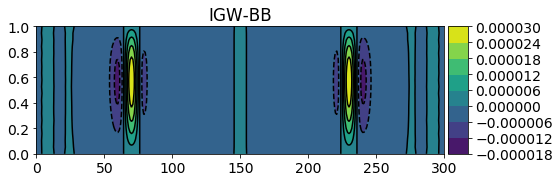

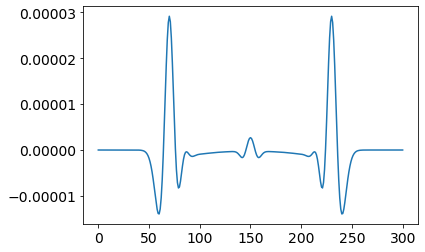

In [238]:
# l_typ = 'WINDOW_STEP'
diff = False

attr_labels = pt.labels()

def get_ens(tc, times, sfx , diff, attribute):
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag='after_full_step', inner=False)[1]

    label = sfx + '_' + attribute
    return label, ens.T

# typ = 'nonhydro'
# typ = 'hydro'
# typ = 'psinc'

# et = 39.4
# sfx1 = 'long_%s' %typ
# if ib: sfx1 = '%s_ib-0' %sfx1
# if st: sfx1 = '%s_st' %sfx1

tc, tags = load(Nx,Ny,et)
times = [0]
times = [260]
if st: times = [39.356]
poss = np.arange(0.0,8.25,0.25) * 3600 / ud.t_ref
poss = np.around(poss,3)
print(poss)
times = [poss[-2]]
times = [57]

# load pickled instances of data used in simulation
fn_pickle = tc.get_filename(N,sfx1,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
mpv = pickle.load(file)
dap = pickle.load(file)
elem = pickle.load(file)
file.close()

S0 = (ud.stratification(elem.y)).reshape(-1,1)

attribute = 'rho'
_, a1 = get_ens(tc, times, sfx1, diff, attribute)
attribute = 'rhov'
_, a2 = get_ens(tc, times, sfx1, diff, attribute)
attribute = 'rhoY'
_, a3 = get_ens(tc, times, sfx1, diff, attribute)

la = 'IGW-BB'
aa = a2 / a1
# aa = a3
aa = aa[i2]

if sfx1 == 'long':
    lvls = np.arange(-2.5,4.0,0.5) * 1e-3
#     lvls = np.arange(-0.1,11,1) * 1e-3
    lvls = np.arange(-0.0025,0.00295,0.000496)

ll = [aa, la]
pl_lst = [ll]

pl = pt.plotter(pl_lst,ncols=1,figsize=(8,3),sharey=False)
y_axs = np.array([0.0,2.0,4.0,6.0,8.0,10.0]) / 10.0
y_loc = np.linspace(0,Ny-1,6)
pl.set_axes(y_locs=y_loc,y_axs=y_axs)
_ = pl.plot(method='contour', lvls=None)

plt.figure()
plt.plot(aa[11])
plt.show()


In [208]:
ls = np.arange(0,28800,1427)
ls0 = np.arange(0,28800,500)
ls = np.append(ls,ls0[1:])
ls = np.append(ls, 28800)
ls = np.sort(ls)
print(ls)

[    0   500  1000  1427  1500  2000  2500  2854  3000  3500  4000  4281
  4500  5000  5500  5708  6000  6500  7000  7135  7500  8000  8500  8562
  9000  9500  9989 10000 10500 11000 11416 11500 12000 12500 12843 13000
 13500 14000 14270 14500 15000 15500 15697 16000 16500 17000 17124 17500
 18000 18500 18551 19000 19500 19978 20000 20500 21000 21405 21500 22000
 22500 22832 23000 23500 24000 24259 24500 25000 25500 25686 26000 26500
 27000 27113 27500 28000 28500 28540 28800]
